<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Масштабирование-числовых-признаков" data-toc-modified-id="Масштабирование-числовых-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Масштабирование числовых признаков</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Уравнивание-классов" data-toc-modified-id="Уравнивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Уравнивание классов</a></span></li><li><span><a href="#Увеличение-выборки-редких-классов" data-toc-modified-id="Увеличение-выборки-редких-классов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки редких классов</a></span></li><li><span><a href="#Уменьшение-выборки-частых-классов" data-toc-modified-id="Уменьшение-выборки-частых-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки частых классов</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Подбираем-оптимальные-гиперпараметры-для-моделей" data-toc-modified-id="Подбираем-оптимальные-гиперпараметры-для-моделей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подбираем оптимальные гиперпараметры для моделей</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Установка отображения не более двух знаков после запятой

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

Импортируем игнорирование предупреждений

In [3]:
import warnings
warnings.simplefilter('ignore')

Считываем данные

In [4]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


Функция для ознакомления с данными

In [6]:
def first_glance(table):
    print(table.info())
    print()
    
    for i in range(len(table.columns)):
        column = table.columns[i]
        
        print(table[column].value_counts())
        print()

In [7]:
first_glance(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

2049    1
8865    1
6806    1
4759    1
8857    1
       ..
9526    1
5432    1
7481    

Пропущенные значения в столбце __Tenure__ составляют 9% от общего массива данных. Так как это немало данных, удалять не будем и заполним пропущенные значения

In [8]:
data.isna().mean()

RowNumber         0.00
CustomerId        0.00
Surname           0.00
CreditScore       0.00
Geography         0.00
Gender            0.00
Age               0.00
Tenure            0.09
Balance           0.00
NumOfProducts     0.00
HasCrCard         0.00
IsActiveMember    0.00
EstimatedSalary   0.00
Exited            0.00
dtype: float64

In [9]:
data.loc[data['Tenure'].isna()].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,"140,469.38",1
48,49,15766205,Yin,550,Germany,Male,38,NaN,"103,391.38",1,0,1,"90,878.13",0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,"146,050.97",2,0,0,"86,424.57",0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,"125,561.97",1,0,0,"164,040.94",1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,"136,857.00",1,0,0,"84,509.57",0


Зависимости значений столбца __Tenure__ от других столбцов не выявлено

In [10]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.00,0.00,0.01,0.00,-0.01,-0.01,0.01,0.00,0.01,-0.01,-0.02
CustomerId,0.00,1.00,0.01,0.01,-0.02,-0.01,0.02,-0.01,0.00,0.02,-0.01
CreditScore,0.01,0.01,1.00,-0.00,-0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,0.00,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,-0.01,-0.02,-0.00,-0.01,1.00,-0.01,0.01,0.03,-0.03,0.01,-0.02
Balance,-0.01,-0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,0.02,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,0.00,-0.01,-0.01,-0.01,0.03,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.01,0.00,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.01,0.02,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01


Поэтому будем заполнять пропущенные значения на основании столбца __Age__, он представляется наиболее подходящим для заполнения

In [11]:
data['Age'].nunique()

70

1. строим таблицу _Возраст - Сколько лет человек является клиентом банка (медиана)_
2. на основании таблицы создаем словарь
3. заменяем пропущенные значения в столбце __Tenure__ на значения медианы из словаря

In [12]:
data['Age'].value_counts(normalize=False).head(10)

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
Name: Age, dtype: int64

In [13]:
data['Tenure'].value_counts(normalize=True)

1.00    0.10
2.00    0.10
8.00    0.10
3.00    0.10
5.00    0.10
7.00    0.10
4.00    0.10
9.00    0.10
6.00    0.10
10.00   0.05
0.00    0.04
Name: Tenure, dtype: float64

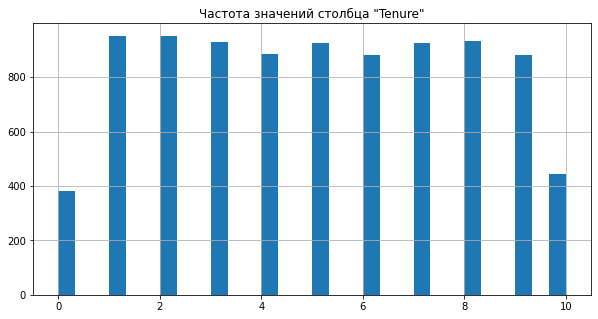

In [14]:
data['Tenure'].hist(bins=30, figsize=(10,5))
plt.title('Частота значений столбца "Tenure"')
plt.show()

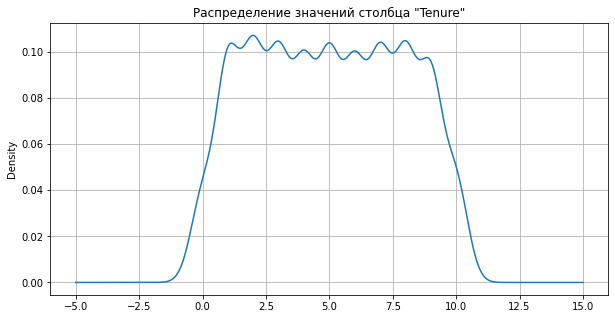

In [15]:
data['Tenure'].plot(kind='kde', grid=True, figsize=(10,5), title='Распределение значений столбца "Tenure"')
plt.show()

In [16]:
age_tenure = data.pivot_table(
    index = 'Age',
    values = 'Tenure',
    aggfunc = 'median'
).reset_index()

age_tenure.head()

,Age,Tenure
0,18,4.50
1,19,5.00
2,20,4.00
3,21,4.00
4,22,6.00


In [17]:
age_dict = {}
for i in range(len(age_tenure)):
    age_dict[age_tenure.loc[i,'Age']] = age_tenure.loc[i,'Tenure']

In [18]:
for i in range(len(data)):
    try:
        if pd.isna(data.loc[i,'Tenure']):
            temp = data.loc[i,'Age']
            data.loc[i,'Tenure'] = age_dict[temp]
    except:
        print('Отсутствующие индексы:', data.index[i])

In [19]:
data['Tenure'].value_counts(normalize=True)

5.00    0.18
1.00    0.10
2.00    0.10
8.00    0.09
3.00    0.09
7.00    0.09
4.00    0.09
6.00    0.09
9.00    0.09
10.00   0.04
0.00    0.04
6.50    0.00
4.50    0.00
Name: Tenure, dtype: float64

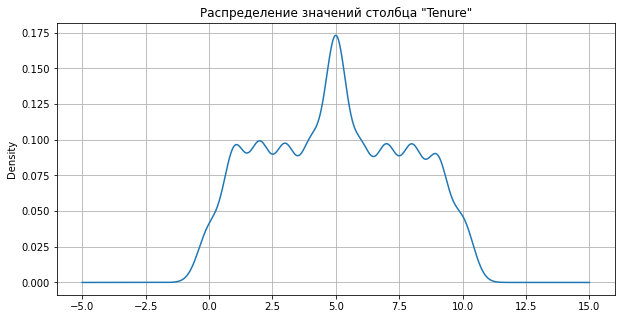

In [20]:
data['Tenure'].plot(kind='kde', grid=True, figsize=(10,5), title='Распределение значений столбца "Tenure"')
plt.show()

Пропущенные значения отсутствуют

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Так как уникальный идентификатор и фамилия клиента являются уникальными значениями и не могут служить заакономерностями при построении алгоритмов модели, удаляем эти данные из массива. Также удаляем номер строки, так как он не несет смысловой нагрузки, но модель будет обучаться дольше

In [22]:
data_formatted = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data_formatted.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Проверяем отсутствие сильной корреляции между столбцами, что могло негативно сказаться на обучении модели

In [23]:
correlation = data_formatted.loc[:,['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']].corr()
correlation

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.00,-0.00,-0.00,0.01,0.01,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tenure,-0.00,-0.01,1.00,-0.01,0.01,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,1.00


In [24]:
# pd.plotting.scatter_matrix(correlation, figsize=(15,15))
# plt.show()

Так как столбцы __Geography__ и __Gender__ не числовые, закодируем их методом One_Hot Encoding

In [25]:
data_ohe = pd.get_dummies(data_formatted, drop_first=True)
data_ohe.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0


### Вывод:
1. заменили пропуски в столбце __Tenure__ на значения медианы в разрезе возраста клиентов (столбец __Age__)
2. удалили столбцы __RowNumber, CustomerId, Surname__ так как они могли только мешать обучению модели
3. закодировали категориальные данные столбцов __Geography__ и __Gender__ методом _ОНЕ_
4. сильно коррелирующие данные столбцов между собой не выявлены

## Исследование задачи

Делаем срезы данных и разбиваем на выборки: для обучения - 60% от общего объема, валидационная выборка - 20% и тестовая выборка - 20%.

In [26]:
features = data_ohe.drop('Exited', axis = 1)
target = data_ohe['Exited']

In [27]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345
)

In [28]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345
)

In [29]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [30]:
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(6000,)
(2000,)
(2000,)


Обучаем модель и предсказываем значения валидационной выборки с помощью моделей: Решающего дерева, Случайного леса, Логистической регрессии. Проверяем качество модели с помощью метрики _f1_ (взаимосвязь полноты и точности)

In [31]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f'F1 Дерево решений = {f1}')

F1 Дерево решений = 0.503052503052503


In [32]:
model = RandomForestClassifier(n_estimators=10,random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f'F1 Случайный лес = {f1}')

F1 Случайный лес = 0.5481927710843373


In [33]:
model = LogisticRegression(solver='liblinear',random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print(f'F1 Логистическая регрессия = {f1}')

F1 Логистическая регрессия = 0.08385744234800838


### Масштабирование числовых признаков

Так как числовые значения имеют разный порядок, масштабируем данные методом стандартизации

In [34]:
numeric = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
]

In [35]:
pd.options.mode.chained_assignment=None

In [36]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train_scaled = scaler.transform(features_train[numeric])
features_valid_scaled = scaler.transform(features_valid[numeric])

Проверяем значение метрики _f1_ на моделях

In [37]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
f1 = f1_score(target_valid, predicted_valid)
print(f'F1 Дерево решений (масштабированный) = {f1}')

F1 Дерево решений (масштабированный) = 0.4204131227217497


In [38]:
model = RandomForestClassifier(n_estimators=10,random_state=12345)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
f1 = f1_score(target_valid, predicted_valid)
print(f'F1 Случайный лес (масштабированный) = {f1}')

F1 Случайный лес (масштабированный) = 0.46178343949044587


In [39]:
model = LogisticRegression(solver='liblinear',random_state=12345)
model.fit(features_train_scaled, target_train)
predicted_valid = model.predict(features_valid_scaled)
f1 = f1_score(target_valid, predicted_valid)
print(f'F1 Логистическая регрессия (масштабированный) = {f1}')

F1 Логистическая регрессия (масштабированный) = 0.11045364891518737


## Борьба с дисбалансом

Данные несбалансированные, отрицательных значений в 4 раза меньше положительных

In [40]:
data['Exited'].value_counts(normalize=True)

0   0.80
1   0.20
Name: Exited, dtype: float64

### Уравнивание классов

Проверяем на моделях значение метрики _f1_ при гиперпараметре _class_weight='balanced'_ (как с учетом масштабирования признаков, так и без них)

In [41]:
model = DecisionTreeClassifier(class_weight='balanced',random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_train_scaled, target_train)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Дерево решений сбалансированная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Дерево решений сбалансированная:
F1 = 0.482593037214886
F1 (масштабированный) = 0.424390243902439


In [42]:
model = RandomForestClassifier(n_estimators=10,class_weight='balanced',random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_train_scaled, target_train)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Случайный лес сбалансированная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Случайный лес сбалансированная:
F1 = 0.5718654434250765
F1 (масштабированный) = 0.44871794871794873


In [43]:
model = LogisticRegression(solver='liblinear',class_weight='balanced', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_train_scaled, target_train)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Логистическая регрессия сбалансированная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Логистическая регрессия сбалансированная:
F1 = 0.4891846921797005
F1 (масштабированный) = 0.4904679376083189


__Вывод__: В целом, значение метрики возрасло, что свидетельствует о том, что уравнивание классов положительно сказалось на обучении модели

### Увеличение выборки редких классов

Функция по увеличению выборки:
1. принимает признаки, целевые значения, значение во сколько раз увеличиваем выборки
2. разделяет выборки по классам (0 и 1)
3. увеличивает выборку по редкому классу _1_ и соединяет с выборкой по классу _0_
4. перемешивает данные выборки
5. возвращает увеличенные выборки

In [44]:
def upsample(features, target, repeat):
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    features_upsampled = pd.concat([features_zero] + [features_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

Применяем функцию к обучающей выборке

In [45]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Масштабируем признаки увеличенной обучающей выборки

In [46]:
features_upsampled_scaled = scaler.transform(features_upsampled[numeric])

Проверяем на моделях значение метрики f1 на увеличенной обучающей выборке (как с учетом масштабирования признаков, так и без них)

In [47]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_upsampled_scaled, target_upsampled)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Дерево решений Увеличенная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Дерево решений Увеличенная:
F1 = 0.4855072463768116
F1 (масштабированный) = 0.4223300970873786


In [48]:
model = RandomForestClassifier(n_estimators=10,random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_upsampled_scaled, target_upsampled)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Случайный лес Увеличенная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Случайный лес Увеличенная:
F1 = 0.5780189959294437
F1 (масштабированный) = 0.5006877579092159


In [49]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_upsampled_scaled, target_upsampled)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Логистическая регрессия Увеличенная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Логистическая регрессия Увеличенная:
F1 = 0.45161290322580644
F1 (масштабированный) = 0.4891209747606614


__Вывод__: Значение метрики возрасло сопоставимо с уравниванием классов

### Уменьшение выборки частых классов

Функция по уменьшению выборки:
1. принимает признаки, целевые значения, значение какую долю от выборки оставить
2. разделяет выборки по классам (0 и 1)
3. случайным образом отбрасывает часть выборки по частому классу _0_ и соединяет с выборкой по классу _1_
4. перемешивает данные выборки
5. возвращает уменьшенные выборки

In [50]:
def downsample(features, target, fraction):
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zero.sample(frac=fraction, random_state=12345)] + [features_one]
    )
    target_downsampled = pd.concat(
        [target_zero.sample(frac=fraction, random_state=12345)] + [target_one]
    )
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )
    return features_downsampled, target_downsampled

Применяем функцию к обучающей выборке

In [51]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Масштабируем признаки уменьшенной обучающей выборки

In [52]:
features_downsampled_scaled = scaler.transform(features_downsampled[numeric])

Проверяем на моделях значение метрики f1 на уменьшенной обучающей выборке (как с учетом масштабирования признаков, так и без них)

In [53]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_downsampled_scaled, target_downsampled)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Дерево решений Уменьшенная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Дерево решений Уменьшенная:
F1 = 0.4871155444721529
F1 (масштабированный) = 0.4610441767068273


In [54]:
model = RandomForestClassifier(n_estimators=10,random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_downsampled_scaled, target_downsampled)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Случайный лес Уменьшенная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Случайный лес Уменьшенная:
F1 = 0.56973293768546
F1 (масштабированный) = 0.5346341463414634


In [55]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

model.fit(features_downsampled_scaled, target_downsampled)
predicted_valid_scaled = model.predict(features_valid_scaled)
f1_scaled = f1_score(target_valid, predicted_valid_scaled)

print(f'Логистическая регрессия Уменьшенная:')
print(f'F1 = {f1}')
print(f'F1 (масштабированный) = {f1_scaled}')

Логистическая регрессия Уменьшенная:
F1 = 0.450592885375494
F1 (масштабированный) = 0.4866723989681858


__Вывод__: Значение метрики возрасло сопоставимо с уравниванием классов и уменшением выборки редких классов

### Вывод:

In [56]:
table = pd.DataFrame(
    data=[
        ['базовый', 0.50, 0.54, 0.08],
        ['базовый (масштаб.)', 0.42, 0.46, 0.11],
        ['-------------', '---', '---', '---'],
        ['сбалансированный',0.48, 0.5718, 0.49],
       ['сбалансированный (масштаб.)', 0.42, 0.44, 0.49],
        ['-------------', '---', '---', '---'],
    ['увеличенная выборка', 0.48, 0.5780, 0.45],
    ['увеличенная выборка (масштаб.)', 0.42, 0.50, 0.48],
        ['-------------', '---', '---', '---'],
    ['уменьшенная выборка', 0.48, 0.56, 0.45],
    ['уменьшенная выборка (масштаб.)', 0.46, 0.53, 0.48]
    ], 
    columns=['F1', 'Дерево решений', 'Случайный лес', 'Логистическая регрессия']
)

table

,F1,Дерево решений,Случайный лес,Логистическая регрессия
0,базовый,0.50,0.54,0.08
1,базовый (масштаб.),0.42,0.46,0.11
2,-------------,---,---,---
3,сбалансированный,0.48,0.57,0.49
4,сбалансированный (масштаб.),0.42,0.44,0.49
5,-------------,---,---,---
6,увеличенная выборка,0.48,0.58,0.45
7,увеличенная выборка (масштаб.),0.42,0.50,0.48
8,-------------,---,---,---
9,уменьшенная выборка,0.48,0.56,0.45


Мы тремя разными способами боролись с несбалансированными классами, значение метрики _F1_ улучшились. Наилучшее значение показала модель Случайного леса при увеличенной выборке редкого класса и без стандартизации данных

### Подбираем оптимальные гиперпараметры для моделей

__Решающее дерево__

In [57]:
best_result = 0
best_depth = 0

for depth in range(1,60):
    model = DecisionTreeClassifier(max_depth = depth, random_state=12345) #, class_weight = 'balanced')
#     model.fit(features_train, target_train)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    if best_result < f1:
        best_result = f1
        best_depth = depth

print(f'Дерево решений F1 = {best_result}, оптимальная глубина = {best_depth}')

Дерево решений F1 = 0.5963791267305644, оптимальная глубина = 5


In [58]:
model = DecisionTreeClassifier(max_depth = 5, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'F1: {f1}')
print(f'AUC-ROC: {auc_roc}')

F1: 0.5963791267305644
AUC-ROC: 0.8310244134068074


In [59]:
print(f'Полнота: {recall_score(target_valid, predicted_valid)}')
print(f'Точность: {precision_score(target_valid, predicted_valid)}')
print()
print(f'Матрица неточностей:')
print(confusion_matrix(target_valid, predicted_valid))

Полнота: 0.6698564593301436
Точность: 0.5374280230326296

Матрица неточностей:
[[1341  241]
 [ 138  280]]


__Случайный лес__

In [60]:
model = RandomForestClassifier(n_estimators = 90, max_depth = 9, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'F1: {f1}')
print(f'AUC-ROC: {auc_roc}')

F1: 0.6318036286019211
AUC-ROC: 0.8536707819427894


In [61]:
print(f'Полнота: {recall_score(target_valid, predicted_valid)}')
print(f'Точность: {precision_score(target_valid, predicted_valid)}')
print()
print(f'Матрица неточностей:')
print(confusion_matrix(target_valid, predicted_valid))

Полнота: 0.7081339712918661
Точность: 0.5703275529865125

Матрица неточностей:
[[1359  223]
 [ 122  296]]


In [62]:
for threshold in np.arange(0, 1, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    
    print('Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | Сумма:{:.3f} | Разница:{:.3f}'.format(
        threshold, precision, recall, (precision + recall), (precision - recall)
    )
         )

Порог = 0.00 | Точность = 0.209, Полнота = 1.000 | Сумма:1.209 | Разница:-0.791
Порог = 0.01 | Точность = 0.209, Полнота = 1.000 | Сумма:1.209 | Разница:-0.791
Порог = 0.02 | Точность = 0.209, Полнота = 1.000 | Сумма:1.209 | Разница:-0.791
Порог = 0.03 | Точность = 0.209, Полнота = 1.000 | Сумма:1.209 | Разница:-0.791
Порог = 0.04 | Точность = 0.209, Полнота = 1.000 | Сумма:1.209 | Разница:-0.791
Порог = 0.05 | Точность = 0.210, Полнота = 1.000 | Сумма:1.210 | Разница:-0.790
Порог = 0.06 | Точность = 0.213, Полнота = 1.000 | Сумма:1.213 | Разница:-0.787
Порог = 0.07 | Точность = 0.216, Полнота = 0.995 | Сумма:1.211 | Разница:-0.779
Порог = 0.08 | Точность = 0.222, Полнота = 0.993 | Сумма:1.215 | Разница:-0.771
Порог = 0.09 | Точность = 0.228, Полнота = 0.993 | Сумма:1.220 | Разница:-0.765
Порог = 0.10 | Точность = 0.234, Полнота = 0.990 | Сумма:1.225 | Разница:-0.756
Порог = 0.11 | Точность = 0.240, Полнота = 0.988 | Сумма:1.228 | Разница:-0.748
Порог = 0.12 | Точность = 0.245, Полнота

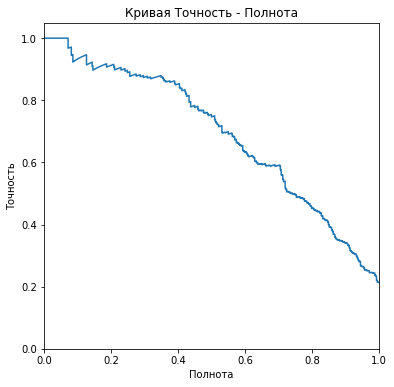

In [63]:
model = RandomForestClassifier(n_estimators = 90, max_depth = 9, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.plot(recall, precision)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Точность - Полнота')
plt.show() 

__Логистическая регрессия__

In [64]:
model = LogisticRegression(solver='liblinear', random_state=12345, class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'Логистическая регрессия F1 = {f1}')
print(f'AUC-ROC: {auc_roc}')

Логистическая регрессия F1 = 0.4891846921797005
AUC-ROC: 0.7540467217924135


In [65]:
print(f'Полнота: {recall_score(target_valid, predicted_valid)}')
print(f'Точность: {precision_score(target_valid, predicted_valid)}')
print()
print(f'Матрица неточностей:')
print(confusion_matrix(target_valid, predicted_valid))

Полнота: 0.7033492822966507
Точность: 0.375

Матрица неточностей:
[[1092  490]
 [ 124  294]]


## Тестирование модели

Объединим обучающую и валидационную выборки, чтобы обучить модель на бОльших данных

In [66]:
df_features = pd.concat([features_upsampled] + [features_valid])

df_features.shape

(11588, 11)

In [67]:
df_target = pd.concat([target_upsampled] + [target_valid])

df_target.shape

(11588,)

Вычислим значение метрики _F1_ и посчитаем площадь под ROC-кривой для проверки модели на актуальность (насколько наша модель отличается от случайной) методом AUC-ROC. 

Для случайной модели AUC-ROC = 0.5

### Решающее дерево

In [68]:
model = DecisionTreeClassifier(max_depth = 5, random_state=12345)
model.fit(df_features, df_target)

predicted_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f'F1: {f1}')
print(f'AUC-ROC: {auc_roc}')

F1: 0.579381443298969
AUC-ROC: 0.8361583699486261


In [69]:
print(f'Полнота: {recall_score(target_test, predicted_test)}')
print(f'Точность: {precision_score(target_test, predicted_test)}')
print()
print(f'Матрица неточностей:')
print(confusion_matrix(target_test, predicted_test))

Полнота: 0.6643026004728132
Точность: 0.5137111517367459

Матрица неточностей:
[[1311  266]
 [ 142  281]]


__Оценка важности признаков модели__

In [70]:
importances = model.feature_importances_
feature_list = list(df_features.columns)

In [71]:
feature_results = pd.DataFrame(
    {'feature': feature_list,'importance': importances}
).sort_values('importance', ascending=False).reset_index(drop=True)

feature_results

,feature,importance
0,Age,0.50
1,NumOfProducts,0.33
2,IsActiveMember,0.11
3,Balance,0.04
4,Geography_Germany,0.01
5,EstimatedSalary,0.00
6,CreditScore,0.00
7,Tenure,0.00
8,HasCrCard,0.00
9,Geography_Spain,0.00


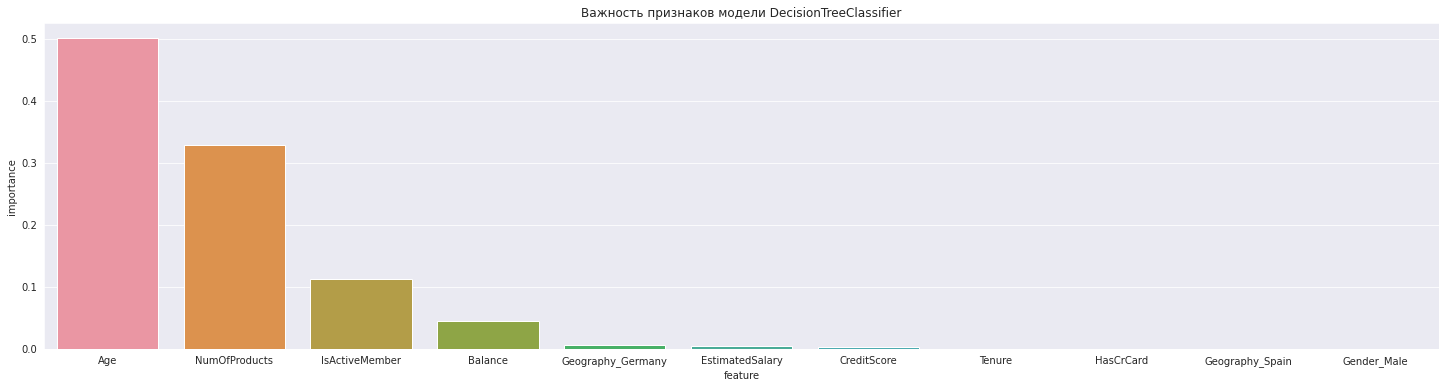

In [72]:
plt.figure(figsize=(25,6))
sns.set_style('darkgrid')
sns.barplot(x='feature', y='importance', data=feature_results)
plt.title('Важность признаков модели '+ 'DecisionTreeClassifier')

plt.show()

In [73]:
%%time
model = DecisionTreeClassifier(max_depth = 5, random_state=12345)
model.fit(df_features, df_target)

CPU times: user 23.9 ms, sys: 27 µs, total: 23.9 ms
Wall time: 22 ms


DecisionTreeClassifier(max_depth=5, random_state=12345)

### Случайный лес

In [74]:
model = RandomForestClassifier(n_estimators = 90, max_depth = 9, random_state=12345)
model.fit(df_features, df_target)

predicted_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f'F1: {f1}')
print(f'AUC-ROC: {auc_roc}')

F1: 0.6141552511415526
AUC-ROC: 0.8587721546881816


In [75]:
print(f'Полнота: {recall_score(target_test, predicted_test)}')
print(f'Точность: {precision_score(target_test, predicted_test)}')
print()
print(f'Матрица неточностей:')
print(confusion_matrix(target_test, predicted_test))

Полнота: 0.6359338061465721
Точность: 0.5938189845474614

Матрица неточностей:
[[1393  184]
 [ 154  269]]


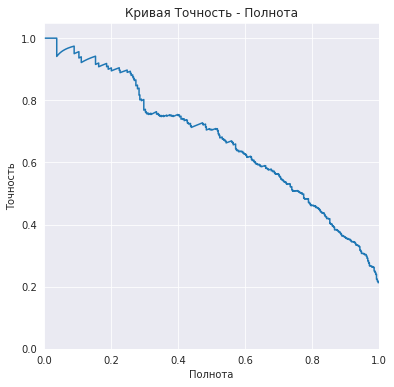

In [76]:
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_one_test)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Точность - Полнота')
plt.show() 

__Оценка важности признаков модели__

In [77]:
importances = model.feature_importances_
importances

array([0.05692147, 0.35529748, 0.03171523, 0.10330051, 0.23078288,
       0.00852765, 0.06622856, 0.05932048, 0.0551526 , 0.0064284 ,
       0.02632475])

In [78]:
feature_list = list(df_features.columns)
feature_list

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [79]:
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

In [80]:
feature_results = feature_results.sort_values('importance', ascending=False).reset_index(drop=True)
feature_results

,feature,importance
0,Age,0.36
1,NumOfProducts,0.23
2,Balance,0.10
3,IsActiveMember,0.07
4,EstimatedSalary,0.06
5,CreditScore,0.06
6,Geography_Germany,0.06
7,Tenure,0.03
8,Gender_Male,0.03
9,HasCrCard,0.01


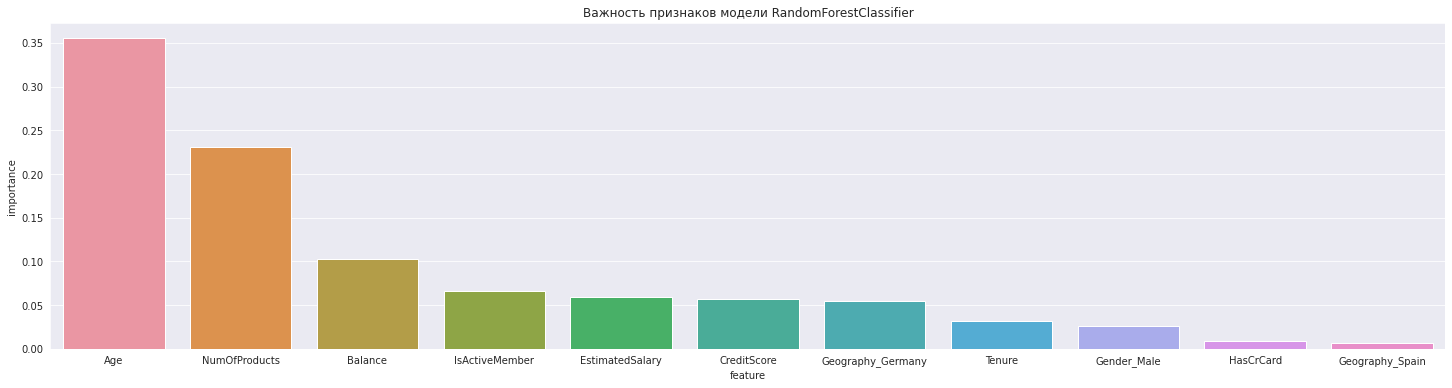

In [81]:
plt.figure(figsize=(25,6))
sns.set_style('darkgrid')
sns.barplot(x='feature', y='importance', data=feature_results)
plt.title('Важность признаков модели '+ 'RandomForestClassifier')

plt.show()

In [82]:
%%time
model = RandomForestClassifier(n_estimators = 90, max_depth = 9, random_state=12345)
model.fit(df_features, df_target)

CPU times: user 716 ms, sys: 4.95 ms, total: 721 ms
Wall time: 730 ms


RandomForestClassifier(max_depth=9, n_estimators=90, random_state=12345)

Для основной нашей модели построим ROC-кривую для наглядности наших предсказаний

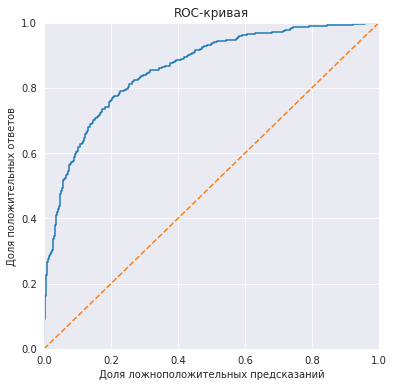

In [83]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
# plt.step(fpr, tpr, where='post')
plt.plot([0,1],[0,1], linestyle='--')

plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('Доля ложноположительных предсказаний')
plt.ylabel('Доля положительных ответов')
plt.title('ROC-кривая')

plt.show()

### Логистическая регрессия

In [84]:
# df_features = pd.concat([features_train] + [features_valid])
# df_target = pd.concat([target_train] + [target_valid])

model = LogisticRegression(solver='liblinear', random_state=12345, class_weight = 'balanced')
model.fit(df_features, df_target)

predicted_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f'F1: {f1}')
print(f'AUC-ROC: {auc_roc}')

F1: 0.430622009569378
AUC-ROC: 0.6864426725191171


In [85]:
print(f'Полнота: {recall_score(target_test, predicted_test)}')
print(f'Точность: {precision_score(target_test, predicted_test)}')
print()
print(f'Матрица неточностей:')
print(confusion_matrix(target_test, predicted_test))

Полнота: 0.6382978723404256
Точность: 0.3249097472924188

Матрица неточностей:
[[1016  561]
 [ 153  270]]


In [86]:
importances = model.coef_
feature_list = list(df_features.columns)

feature_results = pd.DataFrame({'feature': feature_list,'importance': importances[0]})

feature_results = feature_results.sort_values('importance', ascending=False).reset_index(drop=True)
print(feature_results.head())

             feature  importance
0                Age        0.06
1  Geography_Germany        0.01
2            Balance        0.00
3    EstimatedSalary       -0.00
4        CreditScore       -0.00


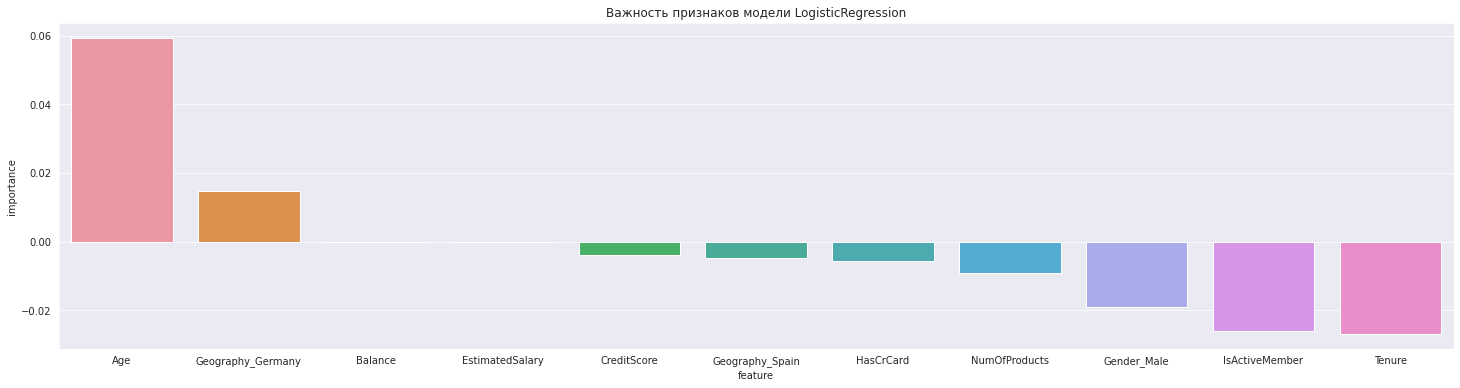

In [87]:
plt.figure(figsize=(25,6))
sns.set_style('darkgrid')
sns.barplot(x='feature', y='importance', data=feature_results)
plt.title('Важность признаков модели '+ 'LogisticRegression')

plt.show()

In [88]:
%%time
model = LogisticRegression(solver='liblinear', random_state=12345, class_weight = 'balanced')
model.fit(df_features, df_target)

CPU times: user 41.6 ms, sys: 0 ns, total: 41.6 ms
Wall time: 45.9 ms


LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')